In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

import seaborn as sns

import matplotlib.pyplot as plt

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
(train_data.corr() > 0.4).sum()

Id                1
MSSubClass        1
LotFrontage       4
LotArea           2
OverallQual      13
OverallCond       1
YearBuilt         8
YearRemodAdd      7
MasVnrArea        3
BsmtFinSF1        4
BsmtFinSF2        1
BsmtUnfSF         2
TotalBsmtSF       9
1stFlrSF         11
2ndFlrSF          6
LowQualFinSF      1
GrLivArea        14
BsmtFullBath      2
BsmtHalfBath      1
FullBath         11
HalfBath          3
BedroomAbvGr      4
KitchenAbvGr      1
TotRmsAbvGrd      8
Fireplaces        4
GarageYrBlt       8
GarageCars       11
GarageArea       10
WoodDeckSF        1
OpenPorchSF       1
EnclosedPorch     1
3SsnPorch         1
ScreenPorch       1
PoolArea          1
MiscVal           1
MoSold            1
YrSold            1
SalePrice        14
dtype: int64

## **1. Train a univariate linear regression by selecting the best feature from the dataset and predict "test.csv".**

In [ ]:
xtrain = train_data['GrLivArea']
ytrain = train_data['SalePrice']

In [ ]:
xtest = test_data['GrLivArea']

### **Features**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


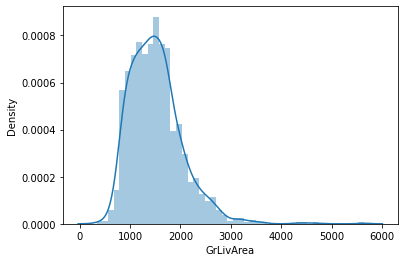

In [ ]:
sns.distplot(xtrain)

### **Labels**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


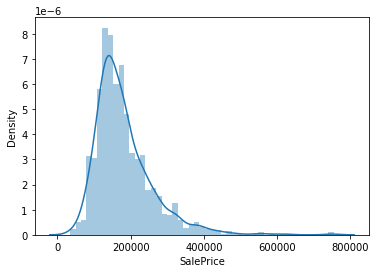

In [ ]:
sns.distplot(ytrain)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


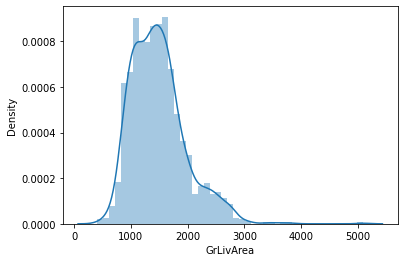

In [ ]:
sns.distplot(xtest)

### **Univariate Liniear Regression**

In [ ]:
linear = LinearRegression()

In [ ]:
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)
xtest = np.array(xtest)

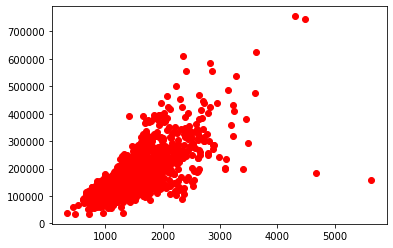

In [ ]:
plt.scatter(xtrain, ytrain, color = 'red')

In [ ]:
xtrain = xtrain.reshape(len(xtrain), 1)
ytrain = ytrain.reshape(len(ytrain), 1)
xtest = xtest.reshape(len(xtest), 1)

In [ ]:
linear = linear.fit(xtrain,ytrain)

In [ ]:
lin_pred = linear.predict(xtest)

In [ ]:
results = pd.DataFrame(lin_pred)
results.columns = ['Predicted']
results.head(6)

,Predicted
0,114557.827490
1,160945.272922
2,193084.380612
3,190406.121638
4,155695.885333
5,195869.769945


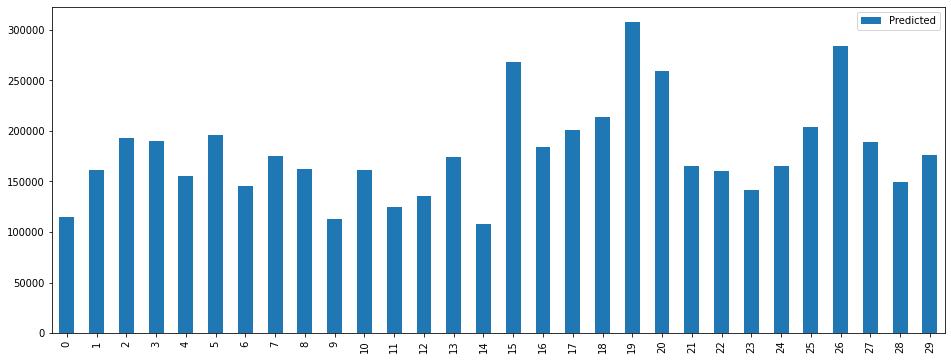

In [ ]:
results.head(30).plot(kind = 'bar', figsize = (16,6))


Text(0.5, 1.0, 'Univariate Scatter Plot for Training Data')

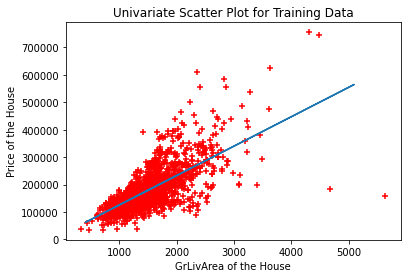

In [ ]:
plt.scatter(xtrain, ytrain, color ='r', marker = '+')
plt.plot(xtest, linear.predict(xtest))
plt.xlabel('GrLivArea of the House')
plt.ylabel('Price of the House')
plt.title('Univariate Scatter Plot for Training Data')

# **2. Train a multivariate linear regression by selecting 5 most important from the dataset and predict "test.csv".**

##**MultiVariate Linear Regression**

In [ ]:
(train_data.corr() > 0.4).sum()

Id                1
MSSubClass        1
LotFrontage       4
LotArea           2
OverallQual      13
OverallCond       1
YearBuilt         8
YearRemodAdd      7
MasVnrArea        3
BsmtFinSF1        4
BsmtFinSF2        1
BsmtUnfSF         2
TotalBsmtSF       9
1stFlrSF         11
2ndFlrSF          6
LowQualFinSF      1
GrLivArea        14
BsmtFullBath      2
BsmtHalfBath      1
FullBath         11
HalfBath          3
BedroomAbvGr      4
KitchenAbvGr      1
TotRmsAbvGrd      8
Fireplaces        4
GarageYrBlt       8
GarageCars       11
GarageArea       10
WoodDeckSF        1
OpenPorchSF       1
EnclosedPorch     1
3SsnPorch         1
ScreenPorch       1
PoolArea          1
MiscVal           1
MoSold            1
YrSold            1
SalePrice        14
dtype: int64

## **5 Features**

In [ ]:
Xtrain = train_data[['OverallQual', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageCars']]
Ytrain = train_data[['SalePrice']]
Xtest = test_data[['OverallQual', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageCars']]

In [ ]:
Xtrain.isnull().sum()

OverallQual    0
1stFlrSF       0
GrLivArea      0
FullBath       0
GarageCars     0
dtype: int64

In [ ]:
Xtest.isnull().sum()

OverallQual    0
1stFlrSF       0
GrLivArea      0
FullBath       0
GarageCars     1
dtype: int64

In [ ]:
Xtest = Xtest.fillna(np.mean(Xtest))

In [ ]:
Xtest.isnull().sum()

OverallQual    0
1stFlrSF       0
GrLivArea      0
FullBath       0
GarageCars     0
dtype: int64

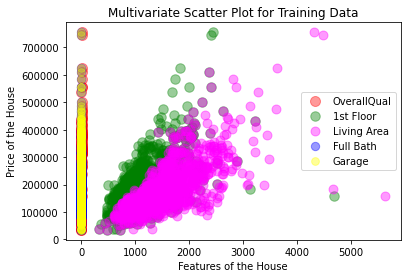

In [ ]:
plt.scatter(Xtrain['OverallQual'], Ytrain, color = 'red', alpha = 0.4, s = 100, label = 'OverallQual')
plt.scatter(Xtrain['1stFlrSF'], Ytrain, color = 'green', alpha = 0.4, s = 90, label = '1st Floor')
plt.scatter(Xtrain['GrLivArea'], Ytrain, color = 'magenta', alpha = 0.4, s = 80, label = 'Living Area')
plt.scatter(Xtrain['FullBath'], Ytrain, color = 'blue', alpha = 0.4, s = 70, label = 'Full Bath')
plt.scatter(Xtrain['GarageCars'], Ytrain, color = 'yellow', alpha = 0.4, s = 60, label = 'Garage')

plt.xlabel('Features of the House')
plt.ylabel('Price of the House')
plt.title('Multivariate Scatter Plot for Training Data')
plt.legend()

In [ ]:
multi = LinearRegression()

In [ ]:
mutli = multi.fit(Xtrain,ytrain)

In [ ]:
multi_pred = multi.predict(Xtest)

In [ ]:
results = pd.DataFrame(multi_pred)
results.columns = ['Multi Predicted']
results.head(6)

,Multi Predicted
0,104303.125022
1,162269.971523
2,153519.611553
3,178290.024152
4,228776.523526
5,174871.047969


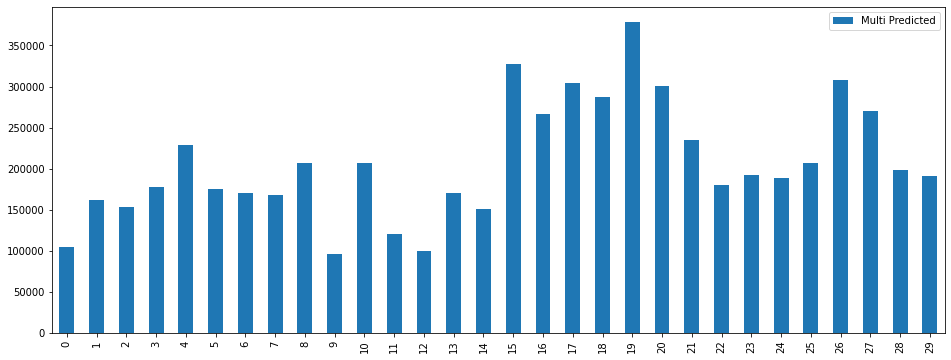

In [ ]:
results.head(30).plot(kind = 'bar', figsize = (16,6))

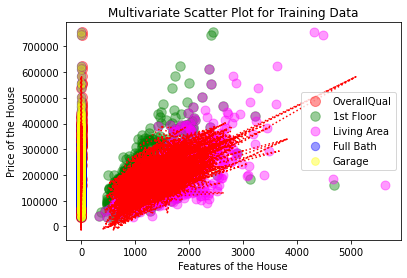

In [ ]:
plt.scatter(Xtrain['OverallQual'], Ytrain, color = 'red', alpha = 0.4, s = 100, label = 'OverallQual')
plt.scatter(Xtrain['1stFlrSF'], Ytrain, color = 'green', alpha = 0.4, s = 90, label = '1st Floor')
plt.scatter(Xtrain['GrLivArea'], Ytrain, color = 'magenta', alpha = 0.4, s = 80, label = 'Living Area')
plt.scatter(Xtrain['FullBath'], Ytrain, color = 'blue', alpha = 0.4, s = 70, label = 'Full Bath')
plt.scatter(Xtrain['GarageCars'], Ytrain, color = 'yellow', alpha = 0.4, s = 60, label = 'Garage')

plt.plot(Xtest, multi_pred, ':r' )
plt.xlabel('Features of the House')
plt.ylabel('Price of the House')
plt.title('Multivariate Scatter Plot for Training Data')
plt.legend()

# **3. Transform features using "Standard Scaler" function and train polynomial regression to predict "test.csv".**

## **Standard Scalar**

In [ ]:
sc = StandardScaler()

In [ ]:
S_train_data = sc.fit_transform(Xtrain)
S_test_data = sc.fit_transform(Xtest)

In [ ]:
New_S_train_data = pd.DataFrame(S_train_data)

In [ ]:
New_S_train_data

,0,1,2,3,4
0,0.651479,-0.793434,0.370333,0.789741,0.311725
1,-0.071836,0.257140,-0.482512,0.789741,0.311725
2,0.651479,-0.627826,0.515013,0.789741,0.311725
3,0.651479,-0.521734,0.383659,-1.026041,1.650307
4,1.374795,-0.045611,1.299326,0.789741,1.650307
...,...,...,...,...,...
1455,-0.071836,-0.542435,0.250402,0.789741,0.311725
1456,-0.071836,2.355701,1.061367,0.789741,0.311725
1457,0.651479,0.065656,1.569647,0.789741,-1.026858
1458,-0.795151,-0.218982,-0.832788,-1.026041,-1.026858


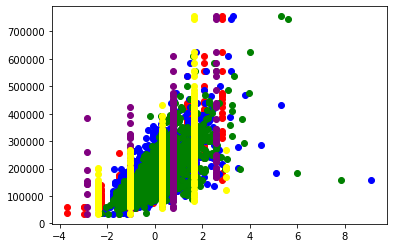

In [ ]:
plt.scatter(S_train_data[:,0], Ytrain, color = 'red')
plt.scatter(S_train_data[:,1], Ytrain, color = 'blue')
plt.scatter(S_train_data[:,2], Ytrain, color = 'green')
plt.scatter(S_train_data[:,3], Ytrain, color = 'purple')
plt.scatter(S_train_data[:,4], Ytrain, color = 'yellow')

## **Polynomial Regression**

In [ ]:
poly = PolynomialFeatures(degree = 2)

In [ ]:
poly_Xtrain = poly.fit_transform(S_train_data)
poly_Xtest = poly.fit_transform(S_test_data)

In [ ]:
poly = poly.fit(poly_Xtrain, Ytrain)

In [ ]:
polynomial = LinearRegression()
polynomial = polynomial.fit(poly_Xtrain, Ytrain)

In [ ]:
poly_pred = polynomial.predict(poly_Xtest)

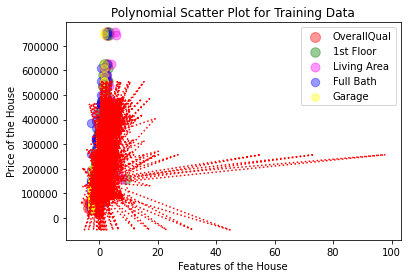

In [ ]:
plt.scatter(S_train_data[:,0], Ytrain, color = 'red', alpha = 0.4, s = 100, label = 'OverallQual')
plt.scatter(S_train_data[:,1], Ytrain, color = 'green', alpha = 0.4, s = 90, label = '1st Floor')
plt.scatter(S_train_data[:,2], Ytrain, color = 'magenta', alpha = 0.4, s = 80, label = 'Living Area')
plt.scatter(S_train_data[:,3], Ytrain, color = 'blue', alpha = 0.4, s = 70, label = 'Full Bath')
plt.scatter(S_train_data[:,4], Ytrain, color = 'yellow', alpha = 0.4, s = 60, label = 'Garage')

plt.plot(poly_Xtest, poly_pred, ':r' )
plt.xlabel('Features of the House')
plt.ylabel('Price of the House')
plt.title('Polynomial Scatter Plot for Training Data')
plt.legend()